# Footballer Attacking Productivity Clustering using Unsupervised Machine Learning

In this project, we cluster football players from Europe’s Big 5 leagues — the English Premier League, Spanish La Liga, French Ligue 1, Italian Serie A, and German Bundesliga — based on their attacking performance metrics in their respective domestic league campaign of 24/25.

## Data

The dataset includes the following features:

`Rk`, `Player`, `Nation`, `Pos`, `Squad`, `Comp`, `Age`, `Born`, `MP`,
`Starts`, `Min`, `90s`, `Gls`, `Ast`, `G+A`, `G-PK`, `PK`, `PKatt`,
`CrdY`, `CrdR`, `xG`, `npxG`, `xAG`, `npxG+xAG`, `PrgC`, `PrgP`, `PrgR`,
`Gls_90`, `Ast_90`, `G+A_90`, `G-PK_90`, `G+A-PK_90`, `xG_90`, `xAG_90`,
`xG+xAG_90`, `npxG_90`, `npxG+xAG_90`

> Note: This dataset only includes attacking performance data from domestic league matches during the 2024/2025 season.

## Project Overview

* **Exploratory Data Analysis (EDA)**
  Understand the distribution, correlations, and patterns within the attacking metrics.

* **K-Means Clustering**
  Group players based on similar attacking traits using unsupervised learning and analyze each feature's contribution to the decision-making.

* **Non-negative Matrix Factorization (NMF)**
  Reduce dimensionality and enable similar player recommendations based on underlying traits.



# Exploratory Data Analysis (EDA)

In [7]:
import pandas as pd

df = pd.read_excel("data/top5-players24-25.xlsx") 
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.02,0.00,0.02
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.10,0.10,0.10
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.06,0.00,0.06,0.06,0.06
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [8]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [9]:
df[['Gls', 'Ast', 'xG', 'npxG', 'xAG', 'npxG+xAG']].describe().T

,count,mean,std,min,25%,50%,75%,max
Gls,2854.0,1.683952,3.156227,0.0,0.0,0.0,2.0,31.0
Ast,2854.0,1.201472,1.946998,0.0,0.0,0.0,2.0,18.0
xG,2854.0,1.706447,2.817890,0.0,0.1,0.7,2.1,27.1
npxG,2854.0,1.563770,2.459233,0.0,0.1,0.7,2.0,24.0
xAG,2854.0,1.215522,1.686843,0.0,0.1,0.6,1.6,14.2
npxG+xAG,2854.0,2.781079,3.745280,0.0,0.2,1.4,3.8,32.4


## Attacking metrics histogram.

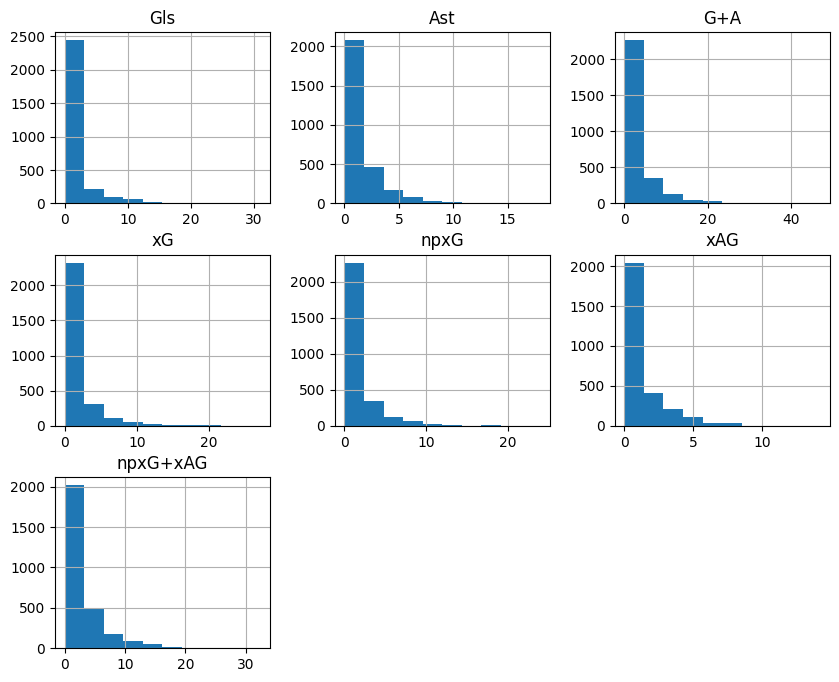

In [11]:
import matplotlib.pyplot as plt

df.hist(column=["Gls", "Ast", "G+A", "xG", "npxG", "xAG", "npxG+xAG"], figsize=(10, 8))
plt.show()

Looking at the distributions, all of them are to the left, confirming that a few players are attacking in the whole game of football, therefore most players' attacking metrics are close to 0.

Let's start by analyzing the best attacking teams in Europe. We'll uncover the **top 15 teams  best attacking teams** based on two key metrics. 
- **Goals (Gls)**
- **Assists (Ast)**

In addition, we'll explore the most consistent attacking teams, where consistency is typically measured using expected values — metrics that begin with an "x". In particular, we will see the highest ranked teams accross two of the most important such values.
- **Expected Goals (xG)** – the likelihood of a shot resulting in a goal based on shot characteristics.
- **Expected Assisted Goals (xAG)** – the likelihood that a pass leads to a shot that turns into a goal.These values help us u
This will help us understand not just how good a team has performed, but how sustainable and repeatable their attacking performances were.

## Goals-Assists and xG-xAG per team

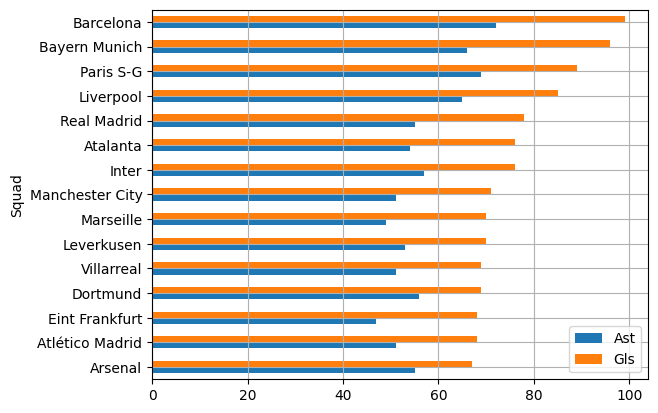

In [27]:
actual = df.groupby(by=["Squad"]).agg({
    "Gls": "sum",
    "Ast": "sum",
}).reset_index().sort_values(by="Gls", ascending=False)

top_15_actual = actual.iloc[: 15, : ][::-1]
top_15_actual.plot(kind="barh", x="Squad", y=["Ast", "Gls"], legend=True, grid=True)
plt.show()

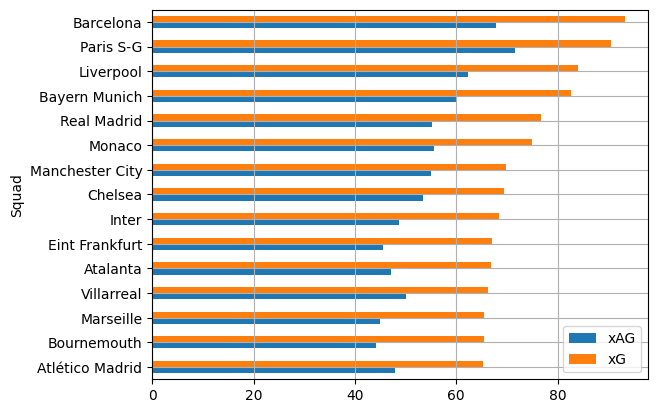

In [28]:
expected = df.groupby(by=["Squad"]).agg({
    "xG": "sum",
    "xAG": "sum",
}).reset_index().sort_values(by="xG", ascending=False)

top_15_expected = expected.iloc[: 15, : ][::-1]
top_15_expected.plot(kind="barh", x="Squad", y=["xAG", "xG"], legend=True, grid=True)
plt.show()

## Efficiency Score

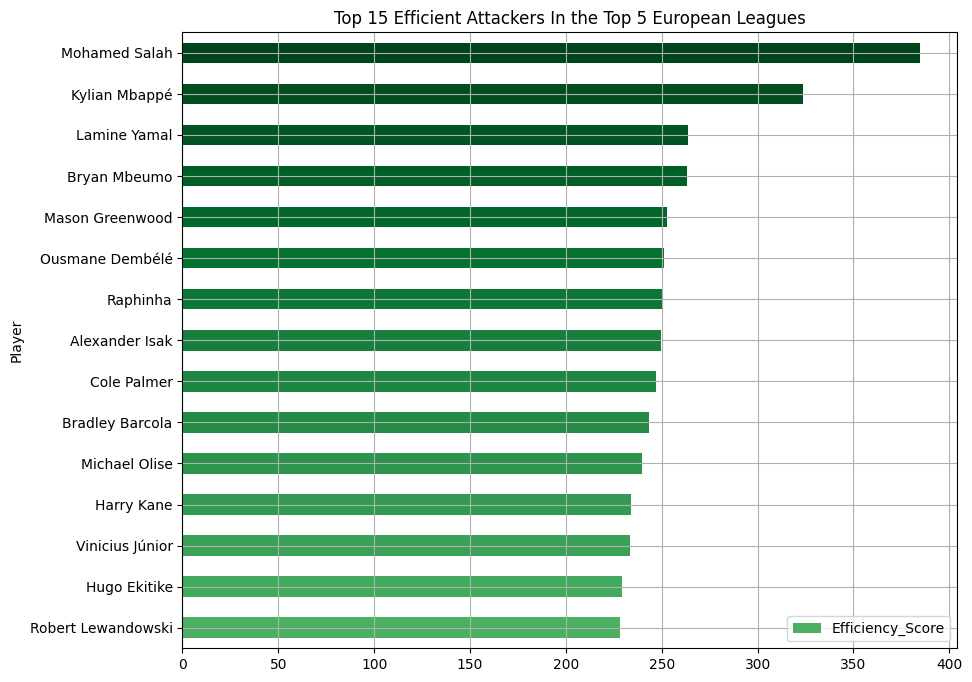

In [29]:
import matplotlib.cm as colormap
import numpy as np

# Set weights
goal_w = 2.0
assist_w = 1.4
xg_w = 0.8
xa_w = 0.6
full_nineties_w = 1.2
np_xg_w = 1.0
pr_gc_w = 0.6
ga_w = 2.5

df["Efficiency_Score"] = (
    goal_w * df["Gls"] +
    assist_w * df["Ast"] +
    xg_w * df["xG"] +
    xa_w * df["xAG"] +
    full_nineties_w * df["90s"] +
    np_xg_w * df["npxG"] +
    pr_gc_w * df["PrgC"] +
    ga_w * df["G+A"]    
)

top_15_efficent_players = df[["Player", "Efficiency_Score"]].sort_values(by="Efficiency_Score").tail(15)

colors = colormap.Greens(np.linspace(0.6, 1, len(top_15_efficent_players)))
top_15_efficent_players.plot(kind="barh", x="Player", y="Efficiency_Score", color=colors, figsize=(10, 8), grid=True)
plt.title("Top 15 Efficient Attackers In the Top 5 European Leagues")
plt.show()

In [31]:
squad_efficiency = df.groupby("Squad")["Efficiency_Score"].mean().reset_index().sort_values(by="Efficiency_Score", ascending=False)

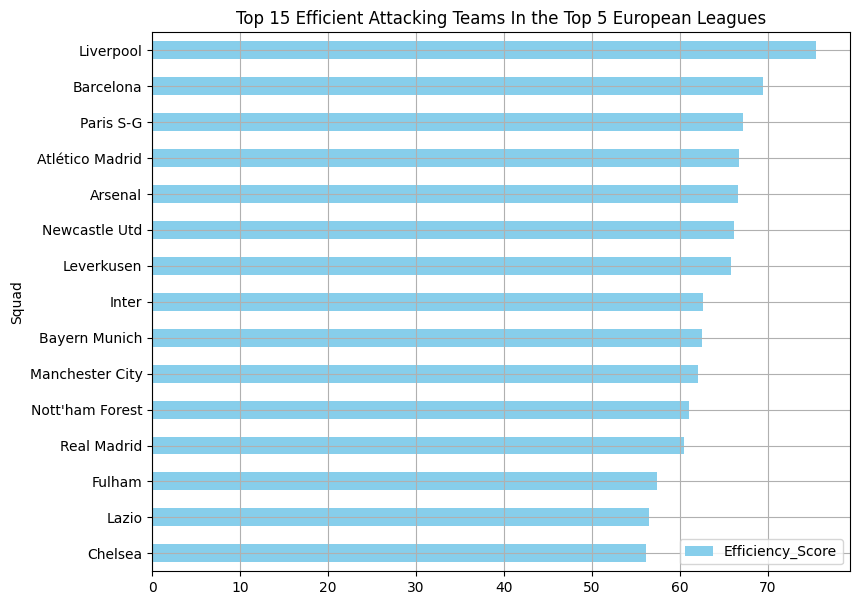

In [32]:
top_15_efficient_squads = squad_efficiency.head(15)[::-1]
top_15_efficient_squads.plot(kind="barh", x="Squad", y="Efficiency_Score", color="skyblue", grid=True, figsize=(9, 7))
plt.title("Top 15 Efficient Attacking Teams In the Top 5 European Leagues")
plt.legend(loc="lower right")
plt.show()

## xG vs Actual Goals: Players

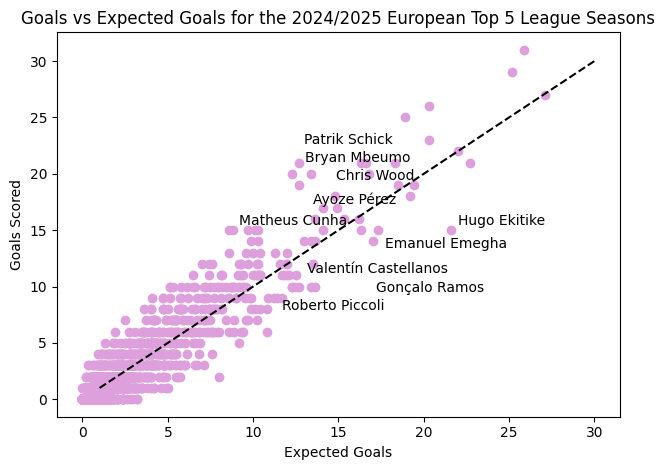

In [34]:
from adjustText import adjust_text

plt.scatter(x="xG", y="Gls", data=df, c="plum")
plt.plot([1, 30], [1, 30], color='black', linestyle='--')
plt.title("Goals vs Expected Goals for the 2024/2025 European Top 5 League Seasons") 
plt.ylabel("Goals Scored")
plt.xlabel("Expected Goals")

players_with_more_than_10_goals = df[df["Gls"] >= 10].copy()
players_with_more_than_10_goals['diff'] = players_with_more_than_10_goals['Gls'] - players_with_more_than_10_goals['xG']
overperformers = players_with_more_than_10_goals.nlargest(5, 'diff')
underperformers = players_with_more_than_10_goals.nsmallest(5, 'diff')

texts = []
for i in range(len(overperformers)):
    texts.append(plt.text(overperformers.iloc[i]['xG'], overperformers.iloc[i]['Gls'], overperformers.iloc[i]['Player']))
    texts.append(plt.text(underperformers.iloc[i]['xG'], underperformers.iloc[i]['Gls'], underperformers.iloc[i]['Player']))
    
adjust_text(texts)
plt.tight_layout()
plt.show()

Players over the line overperformed their expected goal rate while those under it underperformed it. The names shown are the top 5 overperformers selected from those players with a higher goal tally than 10.

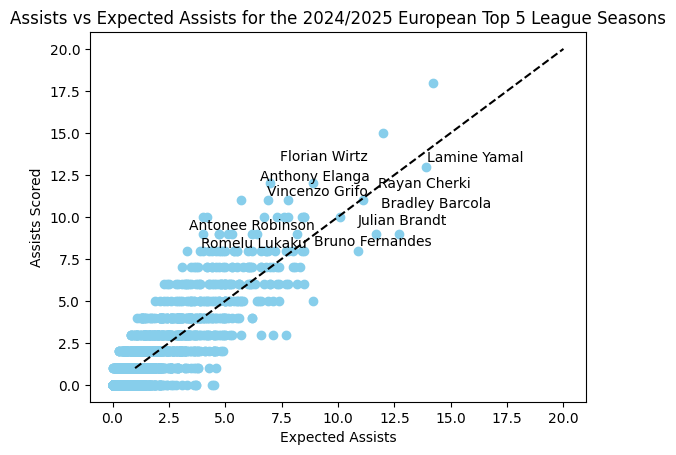

In [24]:
from adjustText import adjust_text
plt.scatter(x="xAG", y="Ast", data=df, c="skyblue")
plt.plot([1, 20], [1, 20], color='black', linestyle='--')
plt.title("Assists vs Expected Assists for the 2024/2025 European Top 5 League Seasons") 
plt.ylabel("Assists Scored")
plt.xlabel("Expected Assists")

players_with_more_than_10_assists = df[df["Ast"] >= 10].copy()
players_with_more_than_10_assists['diff'] = players_with_more_than_10_assists['Ast'] - players_with_more_than_10_assists['xAG']
overperformers = players_with_more_than_10_assists.nlargest(5, 'diff')
underperformers = players_with_more_than_10_assists.nsmallest(5, 'diff')

texts = []
for i in range(len(overperformers)):
    texts.append(plt.text(overperformers.iloc[i]['xAG'], overperformers.iloc[i]['Ast'], overperformers.iloc[i]['Player']))
    texts.append(plt.text(underperformers.iloc[i]['xAG'], underperformers.iloc[i]['Ast'], underperformers.iloc[i]['Player']))
    
adjust_text(texts)
plt.show()

Players over the line overperformed their expected assist rate while those under it underpermed it. The names shown are the top 5 overperformers selected from those players with more than 10 assists.

## Data Cleaning for ML Models

In [50]:
df["Pos"].unique()

array(['DF', 'DF,MF', 'FW', 'MF,FW', 'MF', 'FW,MF', 'GK', 'FW,DF',
       'DF,FW', 'MF,DF'], dtype=object)

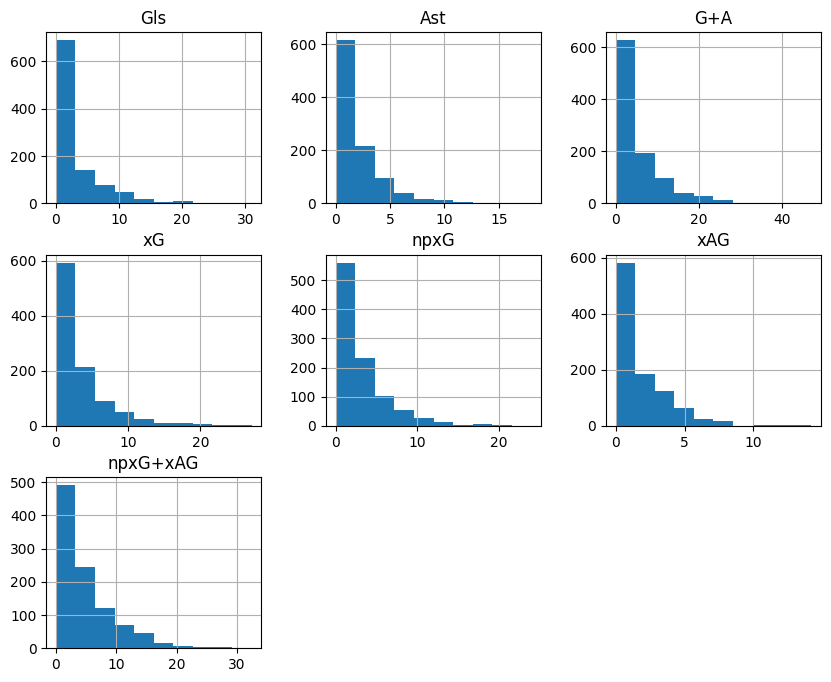

In [52]:
# Only keep forwards 
df = df[df["Pos"].str.contains("FW")]
df.hist(column=["Gls", "Ast", "G+A", "xG", "npxG", "xAG", "npxG+xAG"], figsize=(10, 8))
plt.show()

In [161]:
X = df[['Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt','xG',
        'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR']]

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [163]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)
kmeans.inertia_

4310.398955487181

In [164]:
from sklearn.metrics import silhouette_score

silhouette_score(X_scaled, kmeans.labels_)

0.42160036592051064

As indicated by the relatively low inertia and silhouette scores, the clusters aren't particularly tight or well-separated. However, this is expected, given that the dataset focuses solely on productivity metrics (e.g. goals, expected goals, assists, penalty goals) rather than characteristic metrics (e.g. shots, dribbles, crosses). Productivity metrics capture output but may not fully reflect underlying playing styles or behaviors that typically drive more distinct clustering.

In [165]:
loadings = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
metrics = X.columns
loadings

,Gls,Ast,G+A,G-PK,PK,PKatt,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR
0,-0.569245,-0.552514,-0.625350,-0.580165,-0.290414,-0.313516,-0.576094,-0.586880,-0.598841,-0.651475,-0.563509,-0.581258,-0.656336
1,0.231832,0.224499,0.254481,0.265175,0.002209,0.016933,0.255667,0.291457,0.283465,0.318318,0.309709,0.408832,0.397355
2,0.989423,1.728900,1.383598,1.119596,0.058152,0.144217,0.962039,1.079727,1.841936,1.504279,1.838087,1.609211,1.835869
3,2.915289,1.280675,2.604741,2.597350,2.989016,2.987159,2.920879,2.614049,1.244983,2.311556,0.737753,0.877932,1.285696


In [168]:
def make_spider_plot(metrics: list, data: pd.DataFrame, title: str, color_palette):

    # Change from default cartesian axes to polar
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

    
    n = len(metrics)

    # Specify angles: Remeber to repeat the first to close the shape
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    angles = np.concatenate([angles, [angles[0]]])  
    
    # Customize 
    ax.set_title(title, y=1.1, fontsize=18)
    ax.set_theta_zero_location("N")  # Start at angle 0° i.e. North 
    ax.set_rlabel_position(90) # Puts radial labels at 90°
    ax.set_theta_direction(-1) # Clockwise
    ax.spines['polar'].set_zorder(1) # Comes last
    ax.spines['polar'].set_color('lightgrey')

    
    for idx, (_, row) in enumerate(loadings.iterrows()):
        
        values = row[metrics].values.flatten().tolist()
        values += [values[0]]  
        
        ax.plot(angles, values, label=f"Cluster {idx}", marker='o', markersize=8,
                color=color_palette[idx % len(color_palette)])
        
        ax.fill(angles, values, alpha=0.25, color=color_palette[idx % len(color_palette)])

        # Dashed line at 0
        ax.plot(np.linspace(0, 2*np.pi, 50), [0]*50, color='black', linewidth=2, linestyle='-', zorder=2)
        
        # Show negative values
        ax.set_ylim(-3.5, 3.5)

    plt.xticks(angles, metrics.tolist() + [metrics[0]], color='black', size=12)
    
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    
    return fig

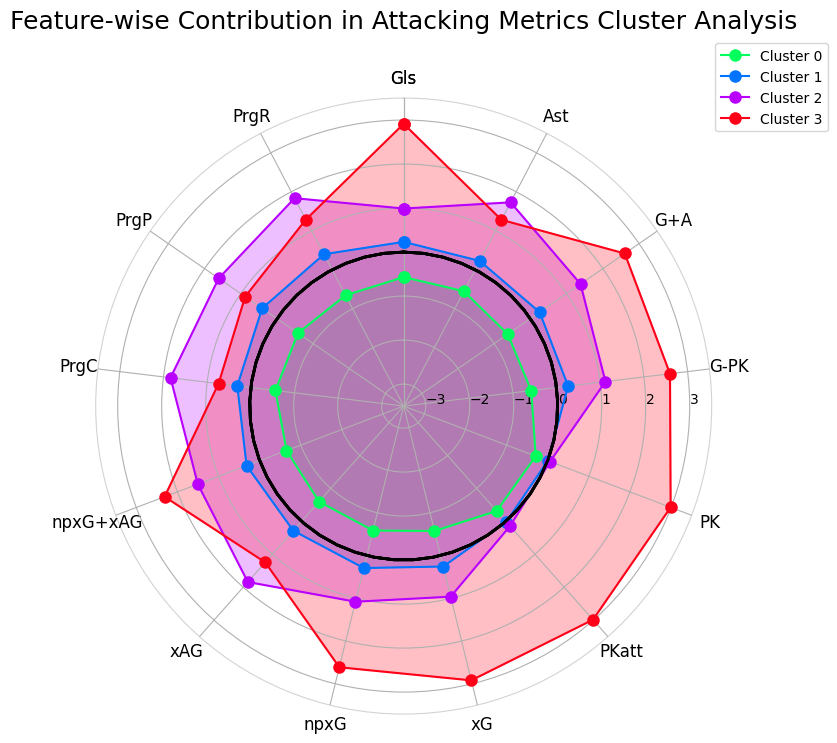

In [167]:
color_palette = colormap.hsv(np.linspace(0.4, 1, len(loadings)))
fig = make_spider_plot(metrics=metrics, data=loadings, title="Feature-wise Contribution in Attacking Metrics Cluster Analysis", color_palette=color_palette) 
plt.show()

In [169]:
from sklearn.metrics import pairwise_distances
import numpy as np

centroids = kmeans.cluster_centers_
distances = pairwise_distances(X_scaled, centroids)  # (2283, 4)

# DF: Player name, Cluster, Distance from cluster
clustered = pd.DataFrame({
    "Player": df.loc[X.index, "Player"],
    "Cluster": labels,
})

clustered["Dist_To_Centroid"] = [distances[i, c] for i, c in enumerate(clustered["Cluster"])]

clustered_by_cluster = clustered.groupby("Cluster")
closest = clustered_by_cluster.apply(lambda df: df.nsmallest(10, "Dist_To_Centroid"), include_groups=False)
closest

Player  Dist_To_Centroid
Cluster                                               
0       1524             Iker Losada          0.286830
        1764            Koji Miyoshi          0.288944
        2474              Ramón Sosa          0.296281
        1994   Gabriel Osei Misehouy          0.307381
        426              Pau Cabanes          0.318561
        1278                    Jota          0.325135
        830             Meschak Elia          0.327810
        1903               Eybi Nije          0.331809
        647              Patson Daka          0.358357
        1201           Stanis Idumbo          0.366737
1       1473        Félix Lemaréchal          0.759138
        2121       Santiago Pierotti          0.784463
        412       Facundo Buonanotte          0.834826
        2751            Timothy Weah          0.843905
        1760           Fabio Miretti          0.884053
        209           Mitchel Bakker          0.898462
        2351               Amin Sarr          0.936022
        2277        Georginio Rutter          0.936273
        1801               Dany Mota          0.988869
        900   Matias Fernandez-Pardo          1.017408
2       1517             Diego López          0.964473
        2634        Leandro Trossard          1.014795
        307           Álex Berenguer          1.322286
        247            Harvey Barnes          1.433016
        680     Charles De Ketelaere          1.554034
        711              Amad Diallo          1.630497
        345             Ludovic Blas          1.704625
        2799            Kenan Yıldız          1.894891
        2002          Dango Ouattara          1.930294
        967            Álvaro García          1.934541
3       103           Julián Álvarez          1.476032
        1991       Riccardo Orsolini          2.211453
        1259            Raúl Jiménez          2.539722
        2787              Chris Wood          2.634306
        1417         Nikola Krstović          2.722993
        1670    Jean-Philippe Mateta          2.736739
        415        Jonathan Burkardt          2.741067
        2750           Ollie Watkins          2.762646
        1537           Romelu Lukaku          2.843864
        1739      Georges Mikautadze          2.955398

In [170]:
outliers = clustered_by_cluster.apply(lambda df: df.nlargest(10, "Dist_To_Centroid"), include_groups=False)
outliers 

Player  Dist_To_Centroid
Cluster                                              
0       72              Chuba Akpom          2.535706
        2524           Tomáš Suslov          2.323827
        158          Jann-Fiete Arp          2.297731
        1376                   Koka          2.183361
        145          Cameron Archer          2.174363
        2477        Riccardo Sottil          2.112441
        2761            Timo Werner          2.068549
        2413            André Silva          2.057372
        624               Yan Couto          2.037492
        2498  Orri Steinn Óskarsson          2.037134
1       2535          Mamadou Sylla          5.256418
        2514       Cristhian Stuani          4.724817
        2133        Joel Pohjanpalo          4.562179
        689     Romain Del Castillo          4.442012
        2115        Roberto Piccoli          4.240157
        2119       Marvin Pieringer          4.234003
        861               Evanilson          4.143512
        1505       Giovani Lo Celso          4.081714
        803            Paulo Dybala          4.030406
        692              Liam Delap          3.975856
2       2792           Lamine Yamal          7.385892
        1960          Michael Olise          6.980972
        6             Himad Abdelli          6.120149
        238         Bradley Barcola          5.899636
        2426            Moses Simon          5.774545
        2779          Florian Wirtz          5.430151
        651        Mikkel Damsgaard          5.078163
        757             Jeremy Doku          4.942185
        541            Rayan Cherki          4.804815
        2512   Jørgen Strand Larsen          4.400088
3       2304          Mohamed Salah         13.874485
        1691          Kylian Mbappé          9.951443
        1317             Harry Kane          8.622090
        1060        Mason Greenwood          7.248023
        2177               Raphinha          6.948966
        1483     Robert Lewandowski          6.684445
        405            Ante Budimir          6.682812
        2033            Cole Palmer          6.021212
        697         Ousmane Dembélé          5.797736
        2780            Yoane Wissa          5.589287

## Cluster Business Analysis
From the analysis above we can draw the following conclusions about the clusters. 

Cluster 3: **Lethal Strikers**. Their values are very high in the positive range across almost all metrics. From the closest players, we see well-rounded forwards like Julián Álvarez, Raúl Jiménez, Georges Mikautadze, and Ollie Watkins. Their outliers paint a better picture — these are the poachers and elite finishers: Salah, Mbappé, Raphinha, and Dembélé.

Cluster 2: Very well-rounded attackers. Their productivity is good across all metrics — both actual and expected, final and non-final. The best "creators" fall into this category. Even though age wasn't used in the model, this group seems to capture young wingers and attacking midfielders: Charles De Ketelaere, Amad Diallo, and Kenan Yıldız are among the most "typical" of this classification. The outliers make this even clearer: Lamine Yamal, Michael Olise, Florian Wirtz, and Rayan Cherki are globally recognized as the best well-rounded and creative forces in elite football of 24/25.

Cluster 1: Above average attackers. Their metrics are close to 0 but in a positive direction. From the outliers, we can see that some of them have breakout qualities or strong individual contributions in certain areas.

Cluster 0: High negative metrics — i.e., less expectation and less performance. We can even see it from the names: these are not the most productive attackers. From the eye, these are low-performing attackers and those who don't play enough minutes.

The features include:
- **Actual performance metrics**: Gls, Ast, G+A, G-PK, PK, PKatt  
- **Expected metrics**: xG, xAG, npxG, npxG+xAG

And also distinguish between:
- **Final contributions**: Gls, Ast, G+A, G-PK, xG, xAG, npxG, npxG+xAG  
- **Non-final actions**: PrgC, PrgP, PrgR — i.e., progressive carries, passes, and receives



Last but not least, we can take advantage of the fact that our data is non-negative and reduce its dimensions to find the most similar attackers.

## Recommending Similar Attacking Players via Non-negative Matrix Factorization (NMF)

In [199]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler, normalize

scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)

nmf = NMF(max_iter=500)
nmf_features = nmf.fit_transform(X_rescaled)

In [200]:
normalized_features = normalize(nmf_features)
idx = np.where(df["Player"] == "Robert Lewandowski")[0][0] # Player example
target_player_features_vector = normalized_features[idx]
similarities = normalized_features.dot(target_player_features_vector)
similar_players = pd.Series(similarities, index=df["Player"])
similar_players.nlargest(10)

Player
Robert Lewandowski    1.000000
Erling Haaland        0.968857
Serhou Guirassy       0.945596
Roberto Piccoli       0.890188
Moise Kean            0.887860
Jonathan Burkardt     0.858528
Gonçalo Ramos         0.822854
Hugo Duro             0.817326
Evanilson             0.790371
Andrej Ilic           0.789405
dtype: float64

The last part of this project "Recommending Similar Attacking Players via Non-negative Matrix Factorization (NMF)", has been refactored as a streamlit app in *football.py*.

## Final Thoughts:

The **clustering task** has limited real-world applicability when relying solely on goal-related metrics. To classify players effectively, we need not only productivity indicators—such as goals, assists, expected goals (xG), and expected assists (xAG)—but also a deeper understanding of **how** they contribute. For instance, knowing a player has 5 assists (Ast=5) and 5 expected assists (xAG=5) is not enough; it’s valuable to understand if those assists mostly come from short passes, long passes, or crosses.

Furthermore, **position-specific metrics** are essential. Different roles require different performance indicators—wingers benefit from tracking crosses and dribbles, while defenders are better evaluated by tackles, blocks, and clearances(in this project we had to drop non-attacking players altogether because their attacking metrics are very low and therefore would have been useless for our clustering study).

That said, I found the **recommendation system** to be very insightful. Even with a limited feature set, it shows promise and could evolve into a powerful tool with richer data.

In future work, I plan to incorporate a more comprehensive dataset that includes **technical, physical, and tactical attributes**. This would allow for deeper analysis and a better understanding of player profiles.

Ultimately, clustering could be particularly useful for **younger players without fixed positions** or for detecting **misprofiled players**. Meanwhile, recommendation systems like this one can aid in **player comparisons, recruitment, and transfer decisions**, providing a data-driven approach to scouting and team-building.

Finally, the exploratory data analysis (EDA) section was especially insightful, particularly in exploring team-wise attacking efficiency and contrasting expected versus actual metrics.